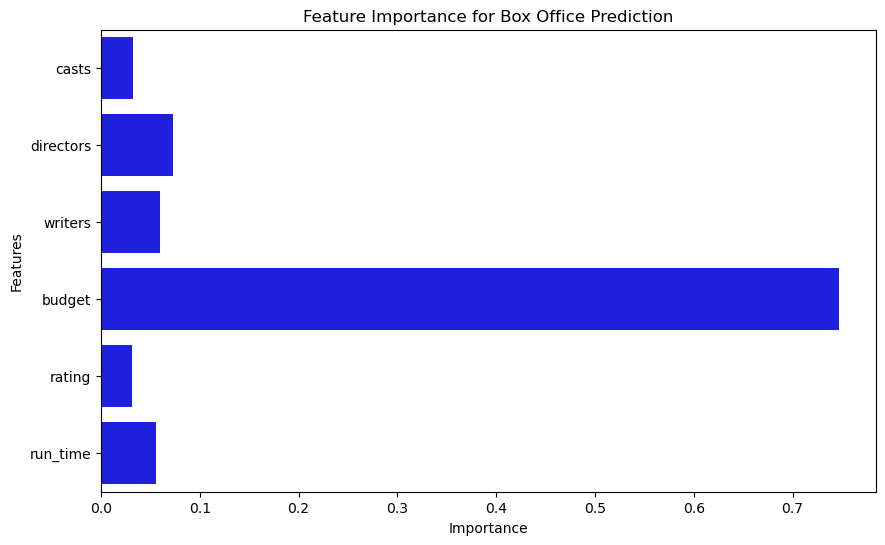

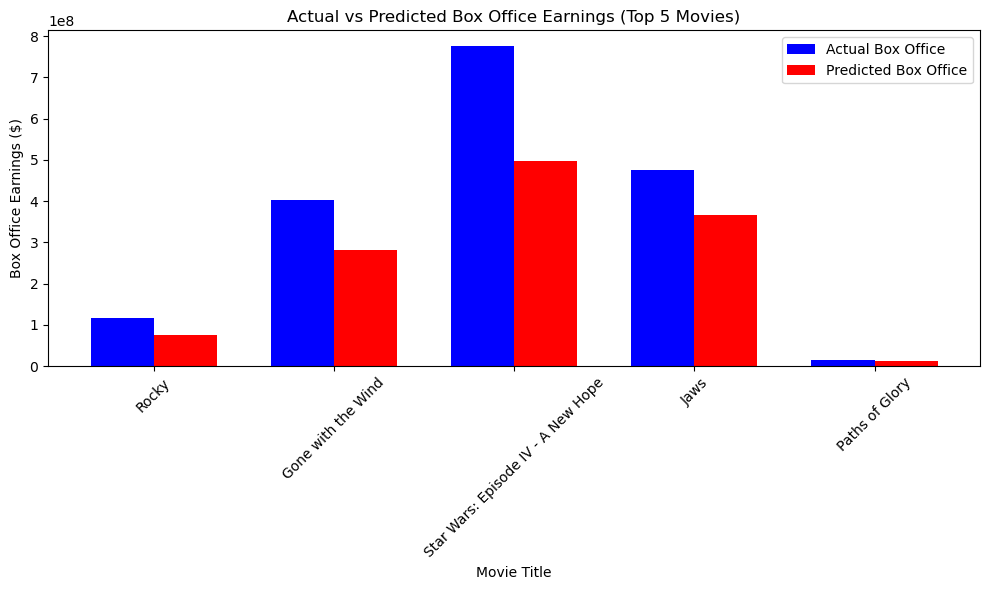

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\Hp\Desktop\BUS Assignments\capstone\IMDB Top 250 Movies.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Feature Engineering - Label encoding for categorical variables
le_cast = LabelEncoder()
le_director = LabelEncoder()
le_writer = LabelEncoder()

df['casts'] = le_cast.fit_transform(df['casts'])
df['directors'] = le_director.fit_transform(df['directors'])
df['writers'] = le_writer.fit_transform(df['writers'])

# Define features and target
features = ['casts', 'directors', 'writers', 'budget', 'rating', 'run_time']
X = df[features]
y = df['box_office']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Calculate feature importances
feature_importances = model.feature_importances_
features = np.array(features)

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features, color='blue')  # Removed palette and used a single color
plt.title('Feature Importance for Box Office Prediction')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Calculate budget yield for selecting top 5 movies
df['budget_yield'] = df['box_office'] / df['budget']

# Select top 5 movies based on budget yield
top_5_movies = df.sort_values(by='budget_yield', ascending=False).head(5)

# Predict box office earnings for the top 5 movies
X_top_5 = top_5_movies[features]
X_top_5_scaled = scaler.transform(X_top_5)
top_5_movies['predicted_box_office'] = model.predict(X_top_5_scaled)

# Bar chart to compare actual vs predicted box office earnings for the top 5 movies
def plot_actual_vs_predicted(top_5_movies):
    plt.figure(figsize=(10, 6))
    
    # Bar chart: Actual vs Predicted
    bar_width = 0.35
    index = np.arange(len(top_5_movies))
    
    plt.bar(index, top_5_movies['box_office'], bar_width, label='Actual Box Office', color='b')
    plt.bar(index + bar_width, top_5_movies['predicted_box_office'], bar_width, label='Predicted Box Office', color='r')
    
    # Add titles and labels
    plt.xlabel('Movie Title')
    plt.ylabel('Box Office Earnings ($)')
    plt.title('Actual vs Predicted Box Office Earnings (Top 5 Movies)')
    plt.xticks(index + bar_width / 2, top_5_movies['name'], rotation=45)  # Changed 'movie_title' to 'name'
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Call the function to plot the comparison
plot_actual_vs_predicted(top_5_movies)
